In [27]:
import pandas as pd

df=pd.read_csv("/content/Loan_Prediction_Dataset.csv")

# Basic info
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [28]:
from sklearn.impute import SimpleImputer

# Numerical columns: handle using mean or median
mean_imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = mean_imputer.fit_transform(df[['LoanAmount']])

median_imputer = SimpleImputer(strategy='median')
df['Loan_Amount_Term'] = median_imputer.fit_transform(df[['Loan_Amount_Term']])

# Binary numerical column: impute using mode (most frequent)
mode_imputer = SimpleImputer(strategy='most_frequent')
df['Credit_History'] = mode_imputer.fit_transform(df[['Credit_History']])

# Categorical columns: handle using mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col] = mode_imputer.fit_transform(df[[col]]).ravel()  # .ravel() flattens the array


# Check if missing values are resolved
print("Missing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [29]:
from sklearn.preprocessing import LabelEncoder

# Label encode binary categorical columns
le = LabelEncoder()
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode multi-category columns
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Show the encoded dataframe
print(df.head())


    Loan_ID  Gender  Married  Education  Self_Employed  ApplicantIncome  \
0  LP001002       1        0          0              0             5849   
1  LP001003       1        1          0              0             4583   
2  LP001005       1        1          0              1             3000   
3  LP001006       1        1          1              0             2583   
4  LP001008       1        0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         False         False          False   
1     

In [30]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the scaled features
print(df[num_cols].head())


   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term
0         0.072991          -0.554487    0.000000          0.273231
1        -0.134412          -0.038732   -0.219273          0.273231
2        -0.393747          -0.554487   -0.957641          0.273231
3        -0.462062           0.251980   -0.314547          0.273231
4         0.097728          -0.554487   -0.064454          0.273231


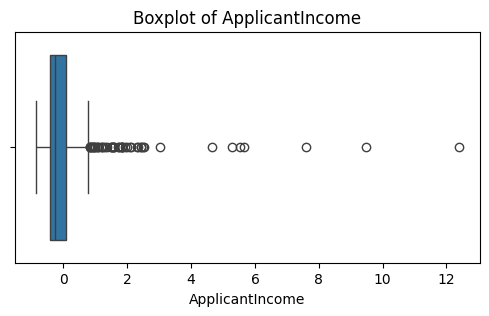

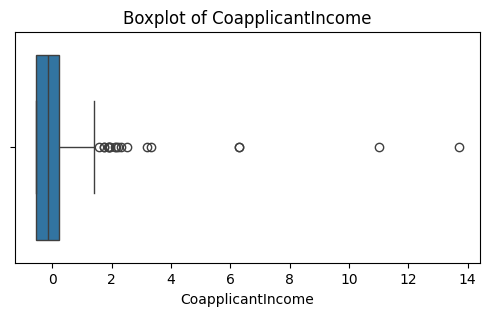

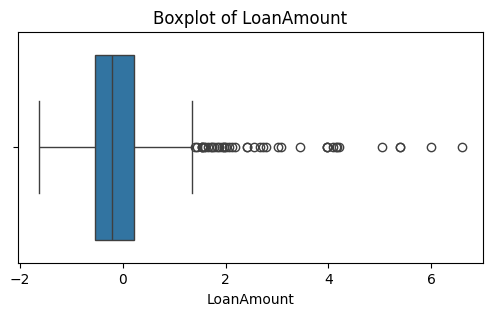

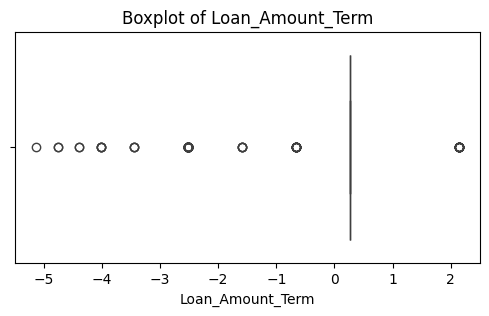

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create boxplots
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
